In [7]:
from data_converter import convert_data

In [8]:
input_video_dir = r'../data/raw/test'
segment_length = 5
video_sample_rate = 3
video_width, video_height = 64, 64
audio_sample_rate = 11025
output_dataset_dir = r'../data/test_dataset'

In [9]:
convert_data(input_video_dir, segment_length, video_sample_rate, video_width, video_height, audio_sample_rate, 1, output_dataset_dir)

input_video_dir: ../data/raw/test
output_dataset_dir: ../data/test_dataset
config:
{'apply_mfcc': 1,
 'audio_sample_rate': 11025,
 'segment_length': 5,
 'video_height': 64,
 'video_sample_rate': 3,
 'video_width': 64}

Remove all contents and continue? (y/n): y
['../data/raw/test\\20220630_KIA_KIWOOM.txt', '../data/raw/test\\20220702_HANWHA_KIWOOM.txt', '../data/raw/test\\20220706_KIWOOM_DOOSAN.txt']
['../data/raw/test\\20220630_KIA_KIWOOM.mp4', '../data/raw/test\\20220702_HANWHA_KIWOOM.mp4', '../data/raw/test\\20220706_KIWOOM_DOOSAN.mp4']
['20220630_KIA_KIWOOM', '20220702_HANWHA_KIWOOM', '20220706_KIWOOM_DOOSAN']
[['../data/test_dataset\\20220630_KIA_KIWOOM\\seg_00000_0.pkl', '../data/test_dataset\\20220630_KIA_KIWOOM\\seg_00001_0.pkl', '../data/test_dataset\\20220630_KIA_KIWOOM\\seg_00002_0.pkl', '../data/test_dataset\\20220630_KIA_KIWOOM\\seg_00003_0.pkl', '../data/test_dataset\\20220630_KIA_KIWOOM\\seg_00004_0.pkl', '../data/test_dataset\\20220630_KIA_KIWOOM\\seg_00005_0.pkl', '../

In [10]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import json

import util.collection_util as cu

In [11]:
def display_segment(segment_path):
    print(f'Segment path: {segment_path}')
    segment = cu.load(segment_path)
    
    print(f'keys: {segment.keys()}')
    print(f'total duration: {segment["total_duration"]}')
    print(f'start: {segment["start_sec"]}')
    print(f'end: {segment["end_sec"]}')
    print(f'label: {segment["label"]}')
    
    video = segment['video']
    audio = segment['audio']

    print(f'video data: {video.shape} {video.dtype}')
    
    rowscols = math.ceil(math.sqrt(video.shape[0]))
    fig, axes = plt.subplots(rowscols, rowscols, figsize=(16, 16))
    axes = axes.flatten()

    for ax, image in zip(axes, video):
        ax.imshow(image.astype(np.float32))
    
    print(f'audio data: {audio.shape} {audio.dtype}')
    
    if metadata['config'].get('apply_mfcc', False):
        import librosa.display
        fig, ax = plt.subplots(1, 1, figsize=(16, 6))
        librosa.display.specshow(audio, sr=metadata['config']['audio_sample_rate'], x_axis='time', ax=ax)
    else:
        fig, axes = plt.subplots(2, 1, figsize=(16, 10))
        for ax, channel in zip(axes, audio.T):
            ax.plot(channel)
    
    print()

In [12]:
dataset_dir = r'E:\juno\highlight_generator\data\dataset'

In [13]:
with open(os.path.join(dataset_dir, 'metadata.json')) as f:
    metadata = json.load(f)
metadata

{'created': '2023-06-10 22:17:21.201663',
 'config': {'segment_length': 5,
  'video_sample_rate': 3,
  'video_width': 64,
  'video_height': 64,
  'audio_sample_rate': 11025,
  'apply_mfcc': 1},
 'data_shape': {'video': [15, 64, 64, 3], 'audio': [40, 108]},
 'total_segment_count': 23232,
 'segment_counts': {'20220513_KIA_LG': 2676,
  '20220518_SAMSUNG_HANWHA': 2496,
  '20220629_KIA_KIWOOM': 2088,
  '20220630_KIA_KIWOOM': 2364,
  '20220702_HANWHA_KIWOOM': 1932,
  '20220706_KIWOOM_DOOSAN': 2160,
  '20220724_SSG_DOOSAN': 2424,
  '20220730_DOOSAN_HANWHA': 2352,
  '20220803_KT_NC': 2520,
  '20220804_KT_NC': 2220}}

In [14]:
normal_segment_path = os.path.join(dataset_dir, r'20220630_KIA_KIWOOM\seg_00342_0.pkl')
highlight_segment_path = os.path.join(dataset_dir, r'20220630_KIA_KIWOOM\seg_00350_1.pkl')

Segment path: E:\juno\highlight_generator\data\dataset\20220630_KIA_KIWOOM\seg_00342_0.pkl
keys: dict_keys(['video', 'audio', 'label', 'start_sec', 'end_sec', 'total_duration'])
total duration: 11820.24
start: 1710
end: 1715
label: 0
video data: (15, 64, 64, 3) float16
audio data: (40, 108) float16



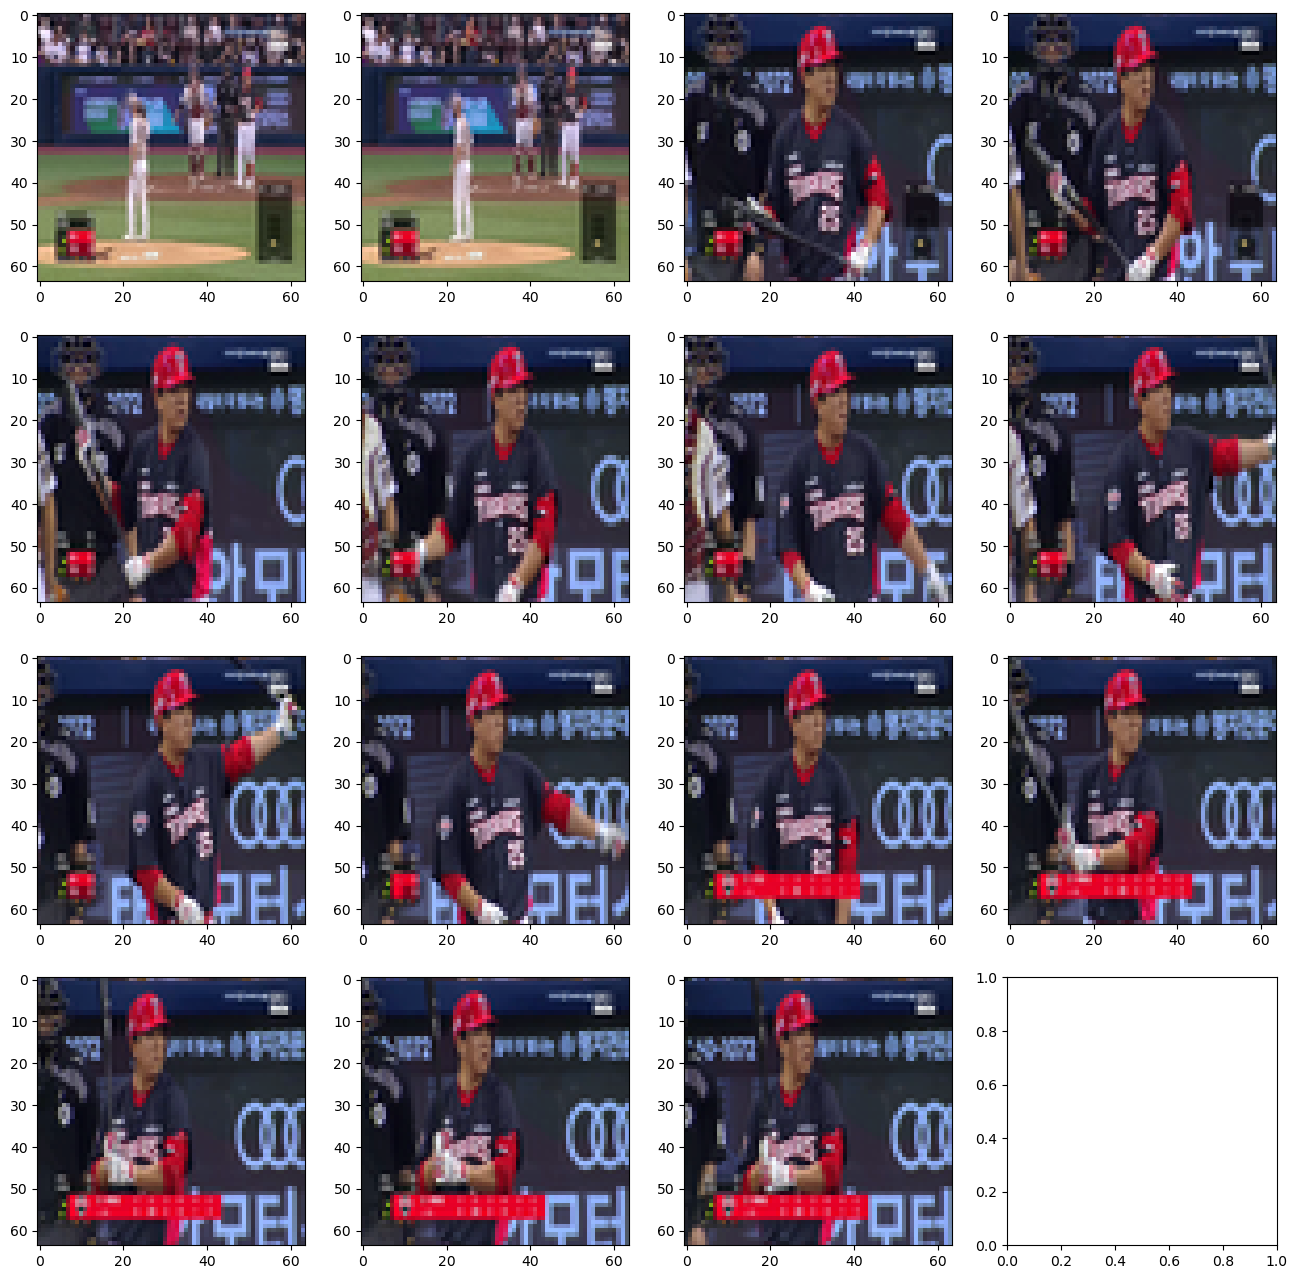

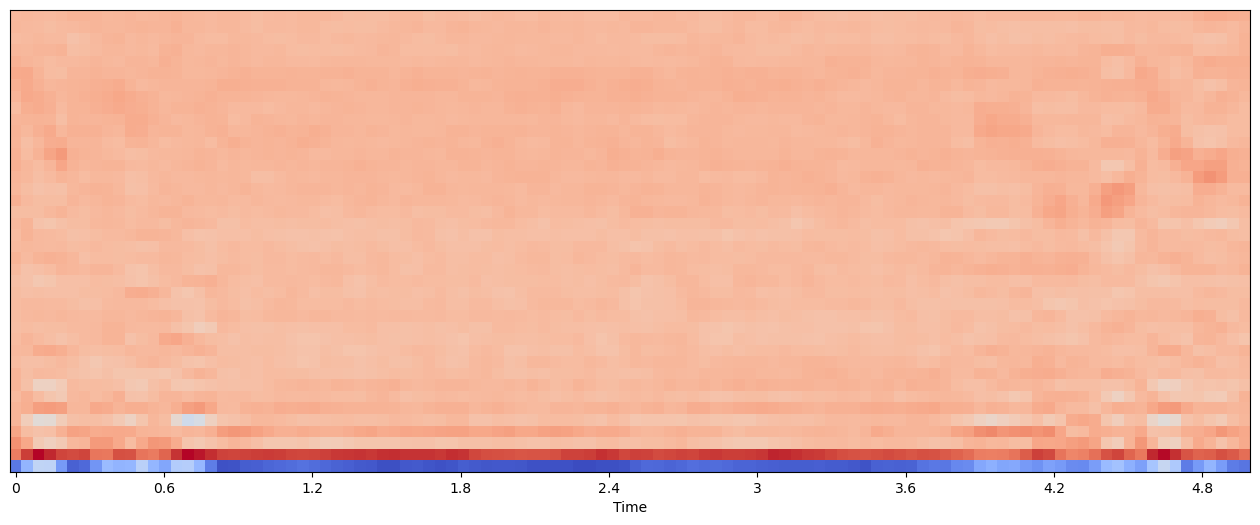

In [15]:
display_segment(normal_segment_path)